In [1]:
import numpy as np # numpy and pandas for numric calculation and operations
import pandas as pd
import matplotlib.pyplot as plt


import seaborn as sns
import warnings  #for warning handling
from sklearn.cluster import KMeans
from scipy.stats import zscore


In [2]:
data=pd.read_csv("C:\\Users\\Perei\\OneDrive\\Documents\\Project 2\\Project_Data_2.csv")
data

,Sales of Wheat in tons,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
1,Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
2,Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
3,American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
4,Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Wallis et Futuna,126,352,64,174,172,93,123,213,107,105,103,13,275,147,63,57,60,25
203,West Bank and Gaza,55,54,54,52,52,50,49,46,44,42,40,39,37,36,35,33,32,31
204,Yemen,265,261,263,253,250,244,233,207,194,175,164,154,149,146,138,137,135,130
205,Zambia,436,456,494,526,556,585,602,626,634,657,658,680,517,478,468,453,422,387


In [3]:
data.columns #showing all columns from dataset



Index(['Sales of Wheat in tons', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007'],
      dtype='object')

In [4]:
data.head(10)# getting first 10 reords

,Sales of Wheat in tons,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
1,Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
2,Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
3,American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
4,Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19
5,Angola,514,514,513,512,510,508,512,363,414,384,530,335,307,281,318,331,302,294
6,Anguilla,38,38,37,37,36,35,35,36,36,36,35,35,35,35,35,34,34,34
7,Antigua and Barbuda,16,15,15,14,13,12,12,11,11,9,8,9,7,9,8,8,9,9
8,Argentina,96,91,86,82,78,74,71,67,63,58,52,51,42,41,39,39,37,35
9,Armenia,52,49,51,55,60,68,74,75,74,86,94,99,97,91,85,79,79,81


In [5]:
data.tail(10)  #last 10 records

,Sales of Wheat in tons,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
197,Uruguay,35,34,33,32,31,30,28,27,28,28,27,25,27,25,23,24,25,23
198,Uzbekistan,114,105,102,118,116,119,111,122,129,134,139,148,144,152,149,144,134,140
199,Vanuatu,278,268,259,250,242,234,226,218,211,159,143,128,149,128,118,131,104,102
200,Venezuela,46,45,44,43,42,42,41,41,40,39,39,41,41,39,38,38,38,39
201,Viet Nam,365,361,358,354,350,346,312,273,261,253,248,243,235,234,226,227,222,220
202,Wallis et Futuna,126,352,64,174,172,93,123,213,107,105,103,13,275,147,63,57,60,25
203,West Bank and Gaza,55,54,54,52,52,50,49,46,44,42,40,39,37,36,35,33,32,31
204,Yemen,265,261,263,253,250,244,233,207,194,175,164,154,149,146,138,137,135,130
205,Zambia,436,456,494,526,556,585,602,626,634,657,658,680,517,478,468,453,422,387
206,Zimbabwe,409,417,415,419,426,439,453,481,392,430,479,523,571,632,652,680,699,714


In [6]:
data.shape # checking the number of rows and columns in the dataset

(207, 19)

In [7]:
data.info() #Printing a concise summary of the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Sales of Wheat in tons  207 non-null    object
 1   1990                    207 non-null    object
 2   1991                    207 non-null    object
 3   1992                    207 non-null    object
 4   1993                    207 non-null    object
 5   1994                    207 non-null    object
 6   1995                    207 non-null    object
 7   1996                    207 non-null    int64 
 8   1997                    207 non-null    int64 
 9   1998                    207 non-null    int64 
 10  1999                    207 non-null    int64 
 11  2000                    207 non-null    int64 
 12  2001                    207 non-null    int64 
 13  2002                    207 non-null    int64 
 14  2003                    207 non-null    int64 
 15  2004  

In [8]:
data.isnull().sum() # checking the count of the missing values in each column

Sales of Wheat in tons    0
1990                      0
1991                      0
1992                      0
1993                      0
1994                      0
1995                      0
1996                      0
1997                      0
1998                      0
1999                      0
2000                      0
2001                      0
2002                      0
2003                      0
2004                      0
2005                      0
2006                      0
2007                      0
dtype: int64

In [9]:
data.describe() #checking statastical values

,1996,1997,1998,1999,2000,2001,2002,2003
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,178.898551,180.975845,178.120773,180.473430,177.521739,177.797101,179.516908,176.405797
std,193.786752,192.272421,188.843079,195.062942,199.438504,205.102644,205.321624,210.272545
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,31.500000,29.500000,29.000000,28.000000,21.500000,22.500000,24.500000,20.500000
50%,88.000000,93.000000,90.000000,90.000000,85.000000,80.000000,79.000000,71.000000
75%,306.500000,320.500000,323.000000,345.500000,319.500000,309.000000,306.000000,297.500000
max,910.000000,853.000000,777.000000,770.000000,761.000000,832.000000,932.000000,960.000000


In [10]:
#in above in min column 0 indicates null value 
#copy datset and filling o values with nan
data_copy =data.copy(deep=True)


In [11]:
data_copy[['1996','1997','1998','1999','2000','2001','2002','2003']] = data_copy[['1996','1997','1998','1999','2000','2001','2002','2003']].replace(0,np.NaN)

In [12]:
data_copy.isnull().sum() #again cheking null values 
                         #after replacing o with nan ther are 7 columns have null value fill those values

Sales of Wheat in tons    0
1990                      0
1991                      0
1992                      0
1993                      0
1994                      0
1995                      0
1996                      2
1997                      1
1998                      2
1999                      1
2000                      2
2001                      2
2002                      0
2003                      3
2004                      0
2005                      0
2006                      0
2007                      0
dtype: int64

In [13]:
#inserting null value with mean
data_copy['1996'].fillna(value=data_copy['1996'].mean(),inplace= True)
data_copy['1997'].fillna(value=data_copy['1997'].mean(),inplace= True)
data_copy['1998'].fillna(value=data_copy['1998'].mean(),inplace= True)
data_copy['1999'].fillna(value=data_copy['1999'].mean(),inplace= True)
data_copy['2000'].fillna(value=data_copy['2000'].mean(),inplace= True)
data_copy['2001'].fillna(value=data_copy['2001'].mean(),inplace= True)
data_copy['2003'].fillna(value=data_copy['2003'].mean(),inplace= True)

In [14]:
data_copy.isnull().sum()

Sales of Wheat in tons    0
1990                      0
1991                      0
1992                      0
1993                      0
1994                      0
1995                      0
1996                      0
1997                      0
1998                      0
1999                      0
2000                      0
2001                      0
2002                      0
2003                      0
2004                      0
2005                      0
2006                      0
2007                      0
dtype: int64

array([[<Axes: title={'center': '1996'}>,
        <Axes: title={'center': '1997'}>,
        <Axes: title={'center': '1998'}>],
       [<Axes: title={'center': '1999'}>,
        <Axes: title={'center': '2000'}>,
        <Axes: title={'center': '2001'}>],
       [<Axes: title={'center': '2002'}>,
        <Axes: title={'center': '2003'}>, <Axes: >]], dtype=object)

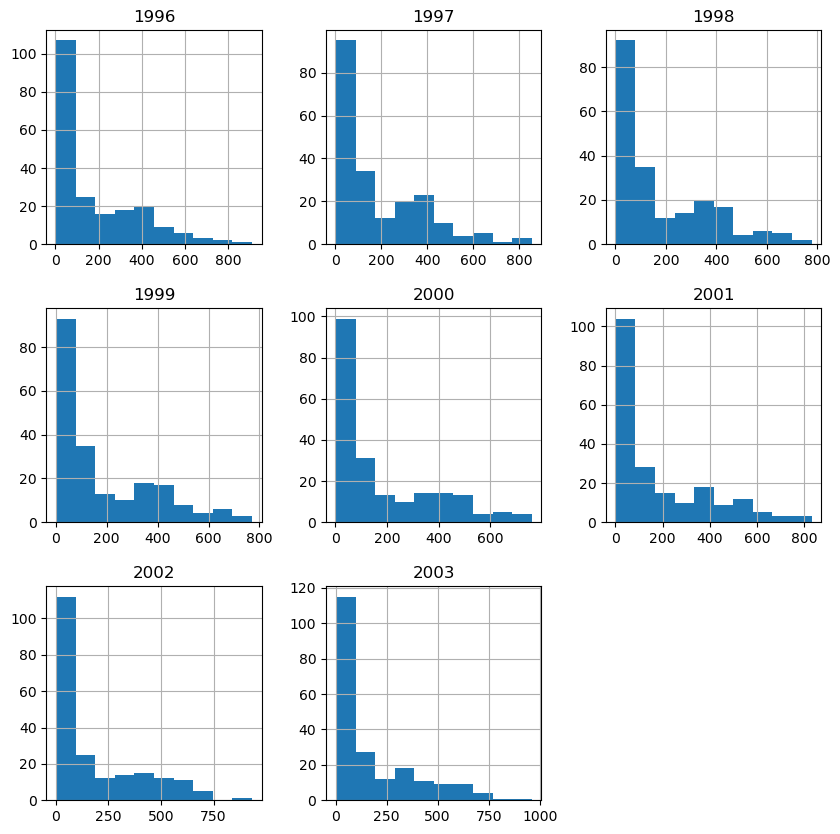

In [15]:
data_copy.hist(figsize=(10,10))
#histogram for clean data

In [16]:
data_copy.isnull().sum() 

Sales of Wheat in tons    0
1990                      0
1991                      0
1992                      0
1993                      0
1994                      0
1995                      0
1996                      0
1997                      0
1998                      0
1999                      0
2000                      0
2001                      0
2002                      0
2003                      0
2004                      0
2005                      0
2006                      0
2007                      0
dtype: int64

In [29]:
data_copy1= data_copy.replace(',','', regex=True)

In [30]:
data_copy1[['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007']]=data_copy1[['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007']].astype(int)

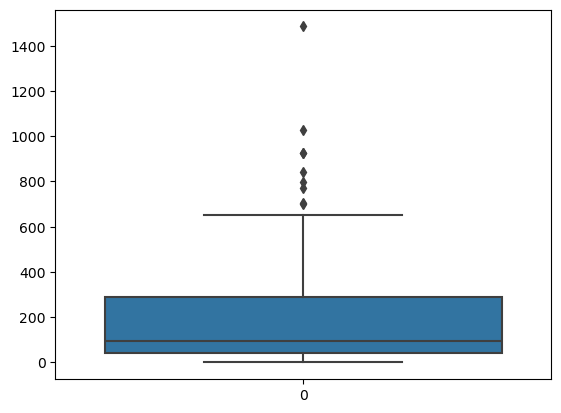

In [31]:
sns.boxplot(data_copy1['1990'],orient='v')
plt.show()

In [32]:
z1=data_copy1['1990'].describe()
lim1=len(data_copy1['1990'])
twenty_five=z1.iloc[4]
# print(twenty_five)
seventy_five=z1.iloc[6]
# print(seventy_five)
iqr=seventy_five-twenty_five
print(iqr)
max_r=seventy_five+1.5*iqr
print(max_r)
min_r=twenty_five-1.5*iqr
print(min_r)
for j in range(0,lim1) :
    if data_copy1['1990'][j]>max_r:
        data_copy1['1990'][j]=max_r
    if data_copy1['1990'][j]<min_r:
        data_copy1['1990'][j]=min_r

248.0
662.0
-330.0


C:\Users\Perei\AppData\Local\Temp\ipykernel_13120\1078125941.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy1['1990'][j]=max_r
C:\Users\Perei\AppData\Local\Temp\ipykernel_13120\1078125941.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy1['1990'][j]=max_r
C:\Users\Perei\AppData\Local\Temp\ipykernel_13120\1078125941.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy1['1990'][j]=max_r
C:\Users\Pere

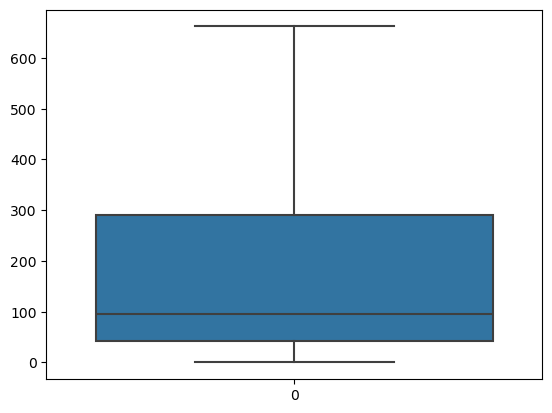

In [33]:
sns.boxplot(data_copy1['1990'],orient='v')
plt.show()

In [34]:
np.unique(data['Sales of Wheat in tons'])

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'French Polynesia',

In [35]:
df_country = pd.get_dummies(data_copy1['Sales of Wheat in tons'],drop_first=False)
data1 = pd.merge(data_copy1,df_country,left_index=True,right_index=True)
data1 = data1.drop('Sales of Wheat in tons',axis=1)
data1.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Virgin Islands (U.S.),Wallis et Futuna,West Bank and Gaza,Yemen,Zambia,Zimbabwe
0,436,429,422,415,407,397,397,387,374,373,...,False,False,False,False,False,False,False,False,False,False
1,42,40,41,42,42,43,42,44,43,42,...,False,False,False,False,False,False,False,False,False,False
2,45,44,44,43,43,42,43,44,45,46,...,False,False,False,False,False,False,False,False,False,False
3,42,14,4,18,17,22,180,25,12,8,...,False,False,False,False,False,False,False,False,False,False
4,39,37,35,33,32,30,28,23,24,22,...,False,False,False,False,False,False,False,False,False,False


In [37]:
from scipy.stats import zscore
data_std=data1.apply(zscore)
data_std

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Virgin Islands (U.S.),Wallis et Futuna,West Bank and Gaza,Yemen,Zambia,Zimbabwe
0,1.268993,1.016419,1.021968,1.019423,1.009478,0.986291,1.123909,1.071880,1.035117,0.986959,...,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673
1,-0.732797,-0.683941,-0.676939,-0.679417,-0.678571,-0.683806,-0.720163,-0.720249,-0.729623,-0.717605,...,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673
2,-0.717555,-0.666456,-0.663562,-0.674863,-0.673946,-0.688524,-0.714968,-0.720249,-0.718959,-0.697006,...,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673
3,-0.732797,-0.797590,-0.841925,-0.788726,-0.794190,-0.782879,-0.003312,-0.819521,-0.894900,-0.892696,...,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673
4,-0.748039,-0.697054,-0.703693,-0.720408,-0.724819,-0.745137,-0.792887,-0.829971,-0.830922,-0.820600,...,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,-0.306019,0.679844,-0.574380,-0.078219,-0.077348,-0.447916,-0.299403,0.162753,-0.388404,-0.393172,...,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,14.352700,-0.069673,-0.069673,-0.069673,-0.069673
203,-0.666748,-0.622745,-0.618971,-0.633872,-0.632323,-0.650781,-0.683801,-0.709799,-0.724291,-0.717605,...,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,14.352700,-0.069673,-0.069673,-0.069673
204,0.400196,0.282074,0.312975,0.281589,0.283386,0.264470,0.272000,0.131404,0.075440,-0.032690,...,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,14.352700,-0.069673,-0.069673
205,1.268993,1.134439,1.343021,1.524976,1.698571,1.873235,2.188795,2.320622,2.421318,2.449486,...,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,14.352700,-0.069673


In [38]:
km = KMeans(n_clusters=5)

In [39]:
# estimate the clusters labels
predicted=km.fit_predict(data_std)

# cluster's average values( center value) for the intereset i.e column name. High value indicates highest interest
centers_df=pd.DataFrame(km.cluster_centers_)
print(centers_df)
#centers_df.head()
centers_df.columns = data_std.columns
# centers_df.columns

C:\Users\Perei\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Perei\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


        0         1         2         3         4         5         6    \
0  0.374031  0.360316  0.421331  0.486771  0.556248  0.636939  0.801845   
1 -0.724840 -0.675735 -0.673279 -0.683585 -0.682323 -0.696179 -0.727464   
2 -0.104714 -0.118769 -0.156071 -0.148999 -0.172219 -0.158091 -0.153534   
3  2.229878  2.424735  2.417379  2.399731  2.372346  2.355924  2.306971   
4  1.341030  1.072151  1.072769  1.065782  1.057708  1.043242  1.065841   

        7         8         9    ...       215       216       217       218  \
0  0.918530  1.011925  1.181877  ... -0.069673 -0.069673 -0.069673 -0.069673   
1 -0.745190 -0.745064 -0.745443  ... -0.069673 -0.069673  0.066387 -0.069673   
2 -0.109222 -0.145170 -0.166722  ...  0.320121  0.320121 -0.069673 -0.069673   
3  2.297763  2.267703  2.204551  ... -0.069673 -0.069673 -0.069673 -0.069673   
4  0.996306  0.993798  0.938404  ... -0.069673 -0.069673 -0.069673  0.445411   

        219       220       221       222       223       224  
0 -0

In [41]:
data1['Cluster_label'] = predicted
data1

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,Vanuatu,Venezuela,Viet Nam,Virgin Islands (U.S.),Wallis et Futuna,West Bank and Gaza,Yemen,Zambia,Zimbabwe,Cluster_label
0,436,429,422,415,407,397,397,387,374,373,...,False,False,False,False,False,False,False,False,False,4
1,42,40,41,42,42,43,42,44,43,42,...,False,False,False,False,False,False,False,False,False,1
2,45,44,44,43,43,42,43,44,45,46,...,False,False,False,False,False,False,False,False,False,1
3,42,14,4,18,17,22,180,25,12,8,...,False,False,False,False,False,False,False,False,False,1
4,39,37,35,33,32,30,28,23,24,22,...,False,False,False,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,126,352,64,174,172,93,123,213,107,105,...,False,False,False,False,True,False,False,False,False,2
203,55,54,54,52,52,50,49,46,44,42,...,False,False,False,False,False,True,False,False,False,1
204,265,261,263,253,250,244,233,207,194,175,...,False,False,False,False,False,False,True,False,False,2
205,436,456,494,526,556,585,602,626,634,657,...,False,False,False,False,False,False,False,True,False,3


In [44]:
data1['Cluster_label'].value_counts()

Cluster_label
1    106
2     37
4     28
0     20
3     16
Name: count, dtype: int64

In [45]:
import random
random.seed(123)
k_rng = range(1,40)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(data_std)
    sse.append(km.inertia_)

C:\Users\Perei\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Perei\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Perei\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Perei\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

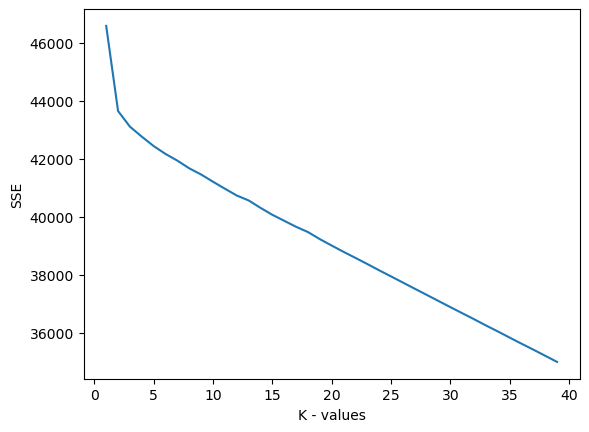

In [46]:
plt.xlabel('K - values')
plt.ylabel("SSE")
plt.plot(k_rng,sse)
plt.show()

In [47]:
km_3= KMeans(n_clusters=3)

In [48]:
predicted_3= km_3.fit_predict(data_std)

C:\Users\Perei\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Perei\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [49]:
centers_df3=pd.DataFrame(km_3.cluster_centers_)
centers_df3.columns = data_std.columns
centers_df3.columns

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999',
       ...
       'Uzbekistan', 'Vanuatu', 'Venezuela', 'Viet Nam',
       'Virgin Islands (U.S.)', 'Wallis et Futuna', 'West Bank and Gaza',
       'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=225)

In [51]:
centers_df3.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Virgin Islands (U.S.),Wallis et Futuna,West Bank and Gaza,Yemen,Zambia,Zimbabwe
0,-0.601840,-0.561550,-0.567304,-0.571231,-0.575820,-0.582408,-0.607576,-0.608520,-0.617583,-0.622298,...,0.034837,0.034837,0.034837,-0.069673,0.034837,0.034837,0.034837,0.034837,-0.069673,-0.069673
1,0.884182,0.718747,0.733287,0.745422,0.762421,0.779746,0.852960,0.850763,0.891912,0.919085,...,-0.069673,-0.069673,-0.069673,0.218774,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673
2,2.044467,2.187186,2.190714,2.187301,2.175898,2.178154,2.168290,2.180926,2.138465,2.101200,...,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,-0.069673,0.689399,0.689399


In [52]:
data2= data1.drop('Cluster_label', axis=1)

In [53]:
data2['cluster_label'] = predicted_3
data2.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,Vanuatu,Venezuela,Viet Nam,Virgin Islands (U.S.),Wallis et Futuna,West Bank and Gaza,Yemen,Zambia,Zimbabwe,cluster_label
0,436,429,422,415,407,397,397,387,374,373,...,False,False,False,False,False,False,False,False,False,1
1,42,40,41,42,42,43,42,44,43,42,...,False,False,False,False,False,False,False,False,False,0
2,45,44,44,43,43,42,43,44,45,46,...,False,False,False,False,False,False,False,False,False,0
3,42,14,4,18,17,22,180,25,12,8,...,False,False,False,False,False,False,False,False,False,0
4,39,37,35,33,32,30,28,23,24,22,...,False,False,False,False,False,False,False,False,False,0


In [55]:
data2['cluster_label'].value_counts()

cluster_label
0    138
1     50
2     19
Name: count, dtype: int64